<a href="https://colab.research.google.com/github/rcostneto/Dataset/blob/main/dataset_cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo de avaliação para determinar se o paciente possui problemas cardíacos**
#### (0 = ausência, 1 = presença)
### *Dataset original(https://archive.ics.uci.edu/dataset/45/heart+disease)*
### Esse modelo foi modificado para se adequar ao algoritimo utilizado(binário), dados tratados.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Carga Dataset(*Doenças Cardíacas*)

In [6]:
# Importando o dataset no github
url = "https://raw.githubusercontent.com/rcostneto/Dataset/main/Cleveland_golden.csv"
# path = "../data/Cleveland_golden.csv"

colunas = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_glucose', 'ecg_rest', 'maximum_fcm', 'restult']

# Leitura dos dados do dataset
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Exibe as 5 primeiras linhas por padrão
dataset.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_glucose,ecg_rest,maximum_fcm,restult
0,63,1,1,145,233,1,1,150,0
1,67,1,0,160,286,0,1,108,1
2,67,1,0,120,229,0,1,129,1
3,37,1,1,130,250,0,0,187,0
4,41,0,1,130,204,0,1,172,0


## Uso do Holdout para treino e teste separadamente

In [7]:
test_size = 0.27 # tamanho da amostragem escolhida
seed =7 # escolha da seed padrão

# Dividindo o dados de treino com dados de teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout

# Usando validação cruzada e sua métrica
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

## Modelos - Classificação e comparação entre modelos

KNN: 0.610474 (0.078014)
NB: 0.750593 (0.062930)
SVM: 0.610672 (0.096345)
LR: 0.768775 (0.052741)
CART: 0.633004 (0.111393)
Bagging: 0.696443 (0.042838)
ET: 0.696640 (0.054784)
Voting: 0.728458 (0.053900)


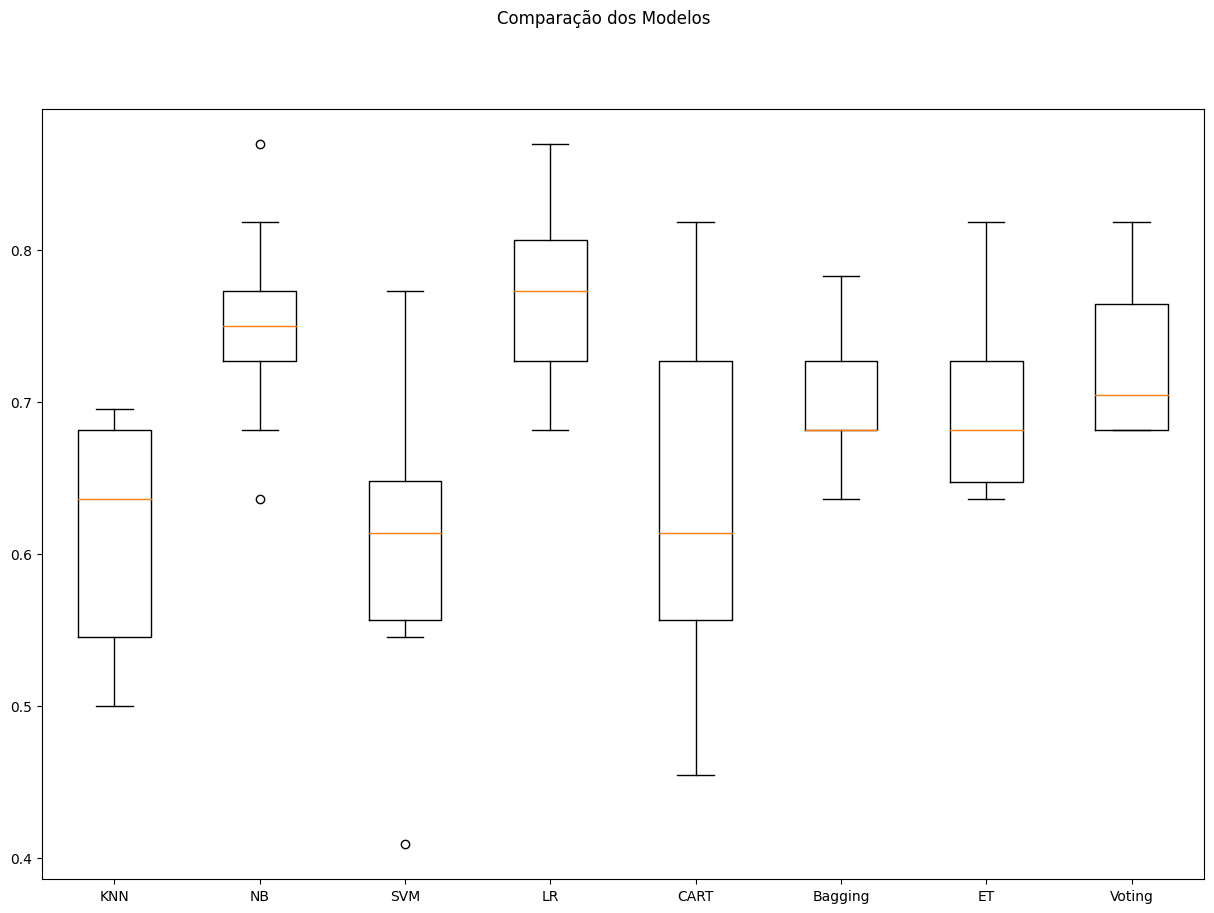

In [8]:
np.random.seed(7) # Determinação da seed global

# Criando lista para armazenar modelos
models = []

# Criando modelo e armazenando na lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))

# Definindo os parâmetros do classificador-base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression()
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base,
n_estimators=num_trees)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,
max_features=max_features)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar e plotar os modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Classificação para comparação entre modelos normalizados, originais e padrões.

KNN-orig: 0.610 (0.078)
NB-orig: 0.751 (0.063)
SVM-orig: 0.611 (0.096)
LR-orig: 0.769 (0.053)
Vot-orig: 0.719 (0.071)
CART-orig: 0.665 (0.107)
Bag-orig: 0.701 (0.059)
ET-orig: 0.710 (0.051)
KNN-padr: 0.733 (0.044)
NB-padr: 0.751 (0.063)
SVM-padr: 0.746 (0.052)
LR-padr: 0.778 (0.063)
Vot-padr: 0.755 (0.052)
CART-padr: 0.660 (0.099)
Bag-padr: 0.714 (0.080)
ET-padr: 0.710 (0.071)
KNN-norm: 0.715 (0.075)
NB-norm: 0.751 (0.063)
SVM-norm: 0.755 (0.077)
LR-norm: 0.769 (0.056)
Vot-norm: 0.751 (0.063)
CART-norm: 0.629 (0.089)
Bag-norm: 0.710 (0.051)
ET-norm: 0.710 (0.047)


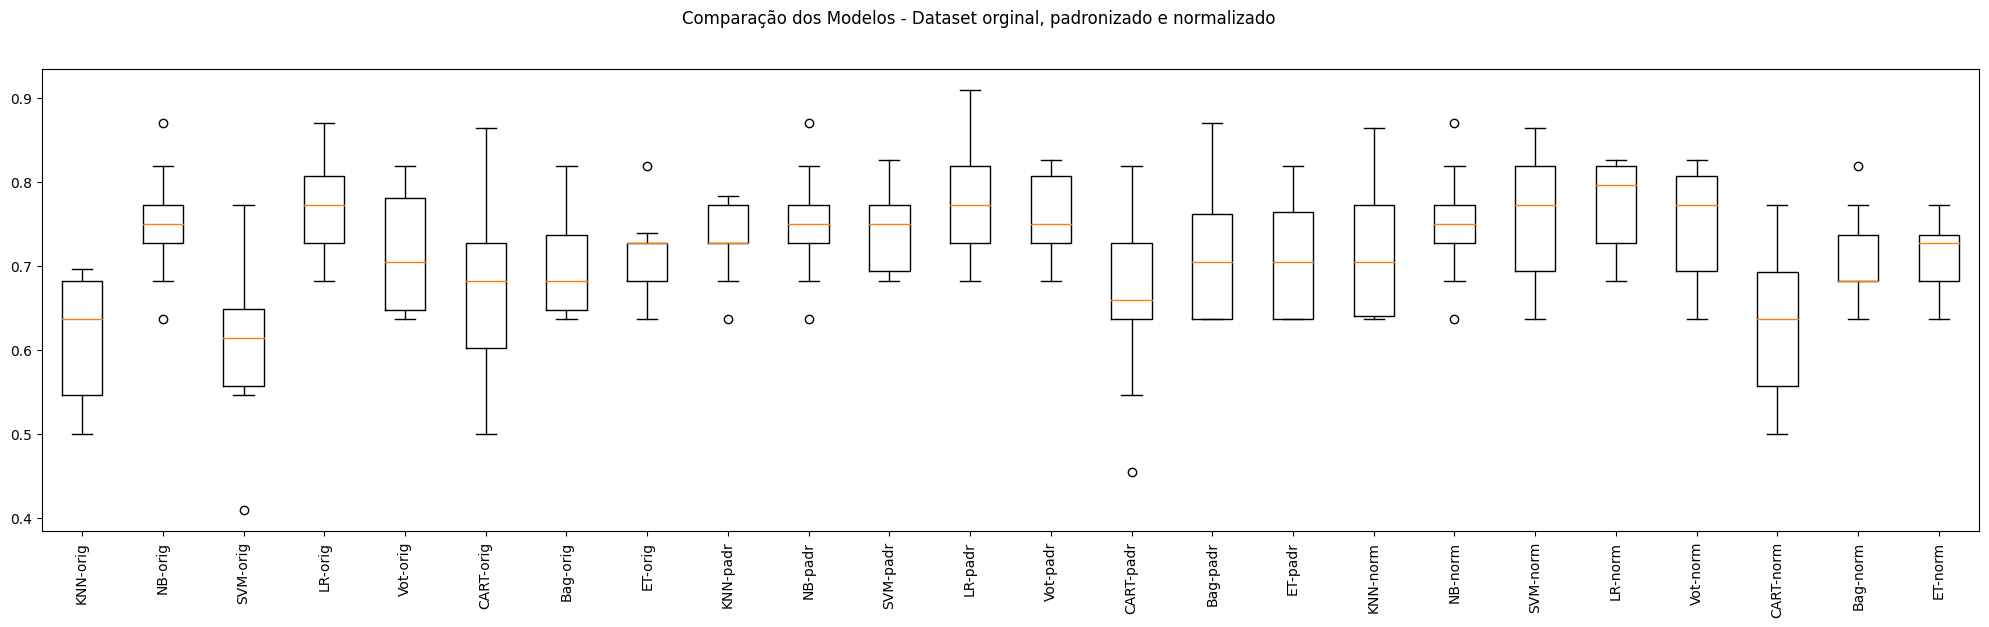

In [9]:
np.random.seed(7) # definindo uma seed global para dados normalizados, originais e padroes

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão comparados
knn = ('KNN', KNeighborsClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
reg_log = ('LR', LogisticRegression())
voting = ('Voting', VotingClassifier(bases))
cart = ('CART', DecisionTreeClassifier())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))

# Transformações que serão utilizadas para padronização e normalização
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('Vot-orig', Pipeline([voting])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Melhoria dos hiperparâmetros
#### OBS: Param_grid escolhido KNN devido possuir melhor resultado mediante comparção com SVM(SVC) e Regressão Logistica(LR)

In [10]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []
# Definindo os componentes do pipeline
# svm = ('SVM', SVC())
# reg_log = ('LR', LogisticRegression())
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('KNN-orig', Pipeline(steps=[knn])))
pipelines.append(('KNN-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('KNN-norm', Pipeline(steps=[min_max_scaler, knn])))

# param_grid = {
#     'SVM__C': [0.1, 0.25, 0.5, 1.0, 5.0, 10, 50, 100],
#     'SVM__gamma':[1, 0.1],
#     'SVM__kernel': ["linear", "poly", "rfb", "simoid"],
# }

# param_grid = {
#     'SVM__C': [0.1, 0.25, 0.5, 1.0, 5.0, 10, 100],
#     'SVM__kernel': ["linear", "poly", "rfb", "simoid"],
# }

# param_grid = {'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
#               'LR__penalty':['none', 'elasticnet', 'l1', 'l2'],
#               'LR__C':[0.001, 0.01, 0.1, 1, 2.5, 5, 10, 50, 100]}

param_grid = {
'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}



# Prepara e executa o GridSearchCV

for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: KNN-orig - Melhor: 0.665217 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Sem tratamento de missings: KNN-padr - Melhor: 0.764032 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Sem tratamento de missings: KNN-norm - Melhor: 0.777866 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


## Conclusão do modelo

In [11]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# model = BaggingClassifier(base_estimator=base, n_estimators=num_trees)
# model = SVC(C= 0.25, kernel= 'poly')
# model = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
model = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
model.fit(rescaledX, y_train)
modelo_nome = 'KNN'

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(predictions)

0.7804878048780488
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 1 0]


In [12]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

## Entradas de dados simuladas para uso do melhor modelo

In [15]:
# Novos dados - não sabemos a classe!
data = {'age':  [43, 65, 71],
        'sex': [0, 1, 0],
        'chest_pain': [0, 0, 0],
        'resting_blood_pressure': [132, 120, 132],
        'cholesterol': [341, 177, 341],
        'fasting_blood_glucose': [1, 0, 1],
        'ecg_rest': [1, 0, 1],
        'maximum_fcm': [136, 140, 136],
        }

atributos = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_glucose', 'ecg_rest', 'maximum_fcm']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.26765071 -1.4572959  -1.05079335  0.01765618  1.82442184  2.394438
   0.9967051  -0.59583688]
 [ 1.17036419  0.68620244 -1.05079335 -0.6652997  -1.34825253 -0.41763453
  -1.00330579 -0.42068425]
 [ 1.83527735 -1.4572959  -1.05079335  0.01765618  1.82442184  2.394438
   0.9967051  -0.59583688]]


## **Resultado simulado de saída**
##### *(1- possui doênças cardíacas, 0- ausência de doênças cardiovasculares)*

In [16]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 1]


#### Gerar o arquivo

In [21]:
# Criando o arquivo de nome KNN.pkl

filename = 'KNN.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Carregamento

In [22]:
# Carregando o arquivo pkl criado

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7804878048780488


#### Realizando a predição

In [23]:
loaded_model.predict(X_test[0:5])

array([0, 0, 1, 1, 1])